✅ Librerías cargadas correctamente
📥 Cargando datos de ejemplo...
✅ Datos cargados correctamente:
   👥 Clientes: 100 registros
   👨‍💼 Empleados: 20 registros
   🧾 Facturas: 500 registros
   📦 Detalles: 2000 registros

📊 INICIANDO ANÁLISIS EXPLORATORIO...

📈 ESTADÍSTICAS DESCRIPTIVAS:
   Total Clientes: 100
   Total Empleados: 20
   Total Facturas: 500
   Total Detalles: 2000
   Ventas Totales: 1,258,469.10
   Venta Promedio: 2,516.94
   Venta Maxima: 4,975.34
   Venta Minima: 52.84
   Periodo Inicio: 2023-01-01
   Periodo Fin: 2024-05-14
   Sucursales Activas: 5
   Productos Vendidos: 50

📊 GENERANDO GRÁFICOS EN PNG...
📈 Gráfico 1: Evolución de ventas mensuales


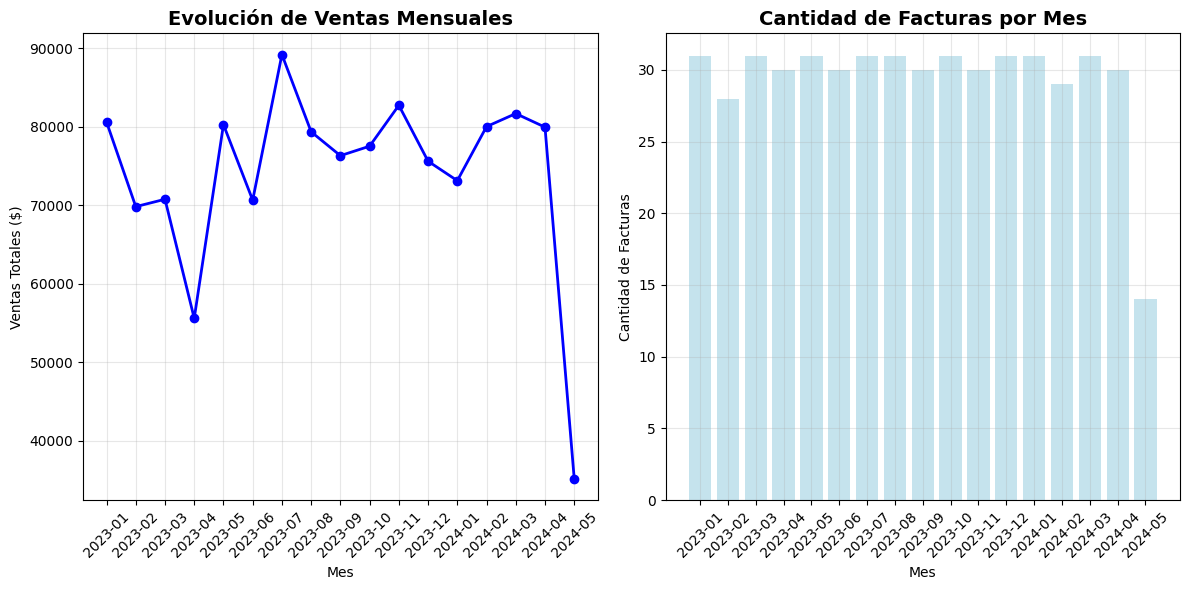

🏪 Gráfico 2: Ventas por sucursal


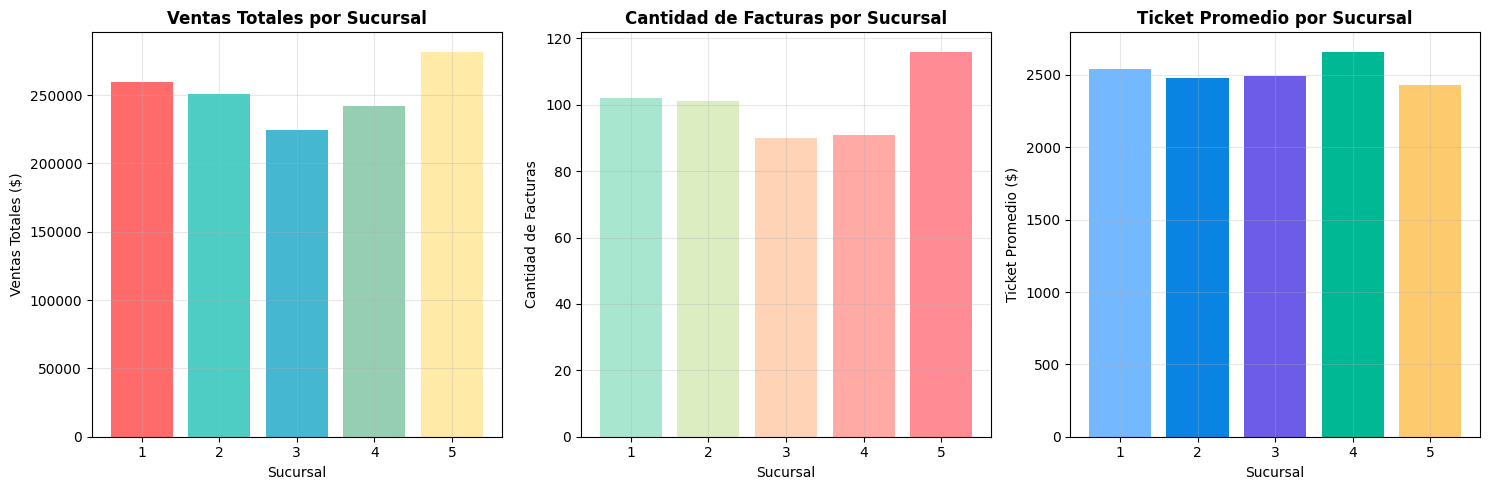

👥 Gráfico 3: Top 10 clientes


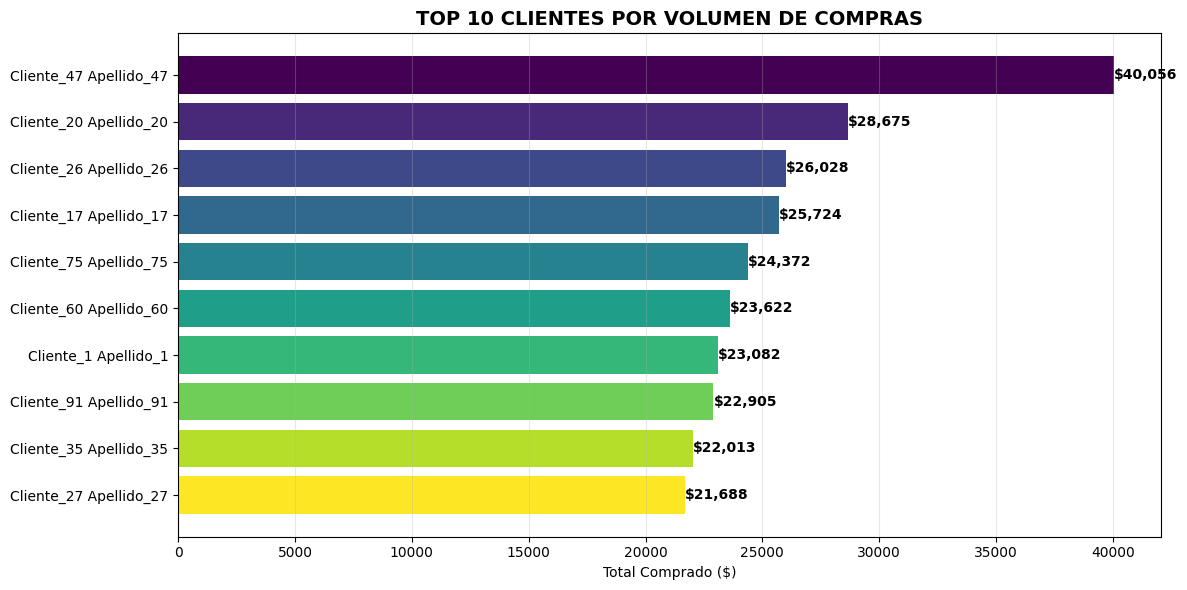

📦 Gráfico 4: Análisis de productos


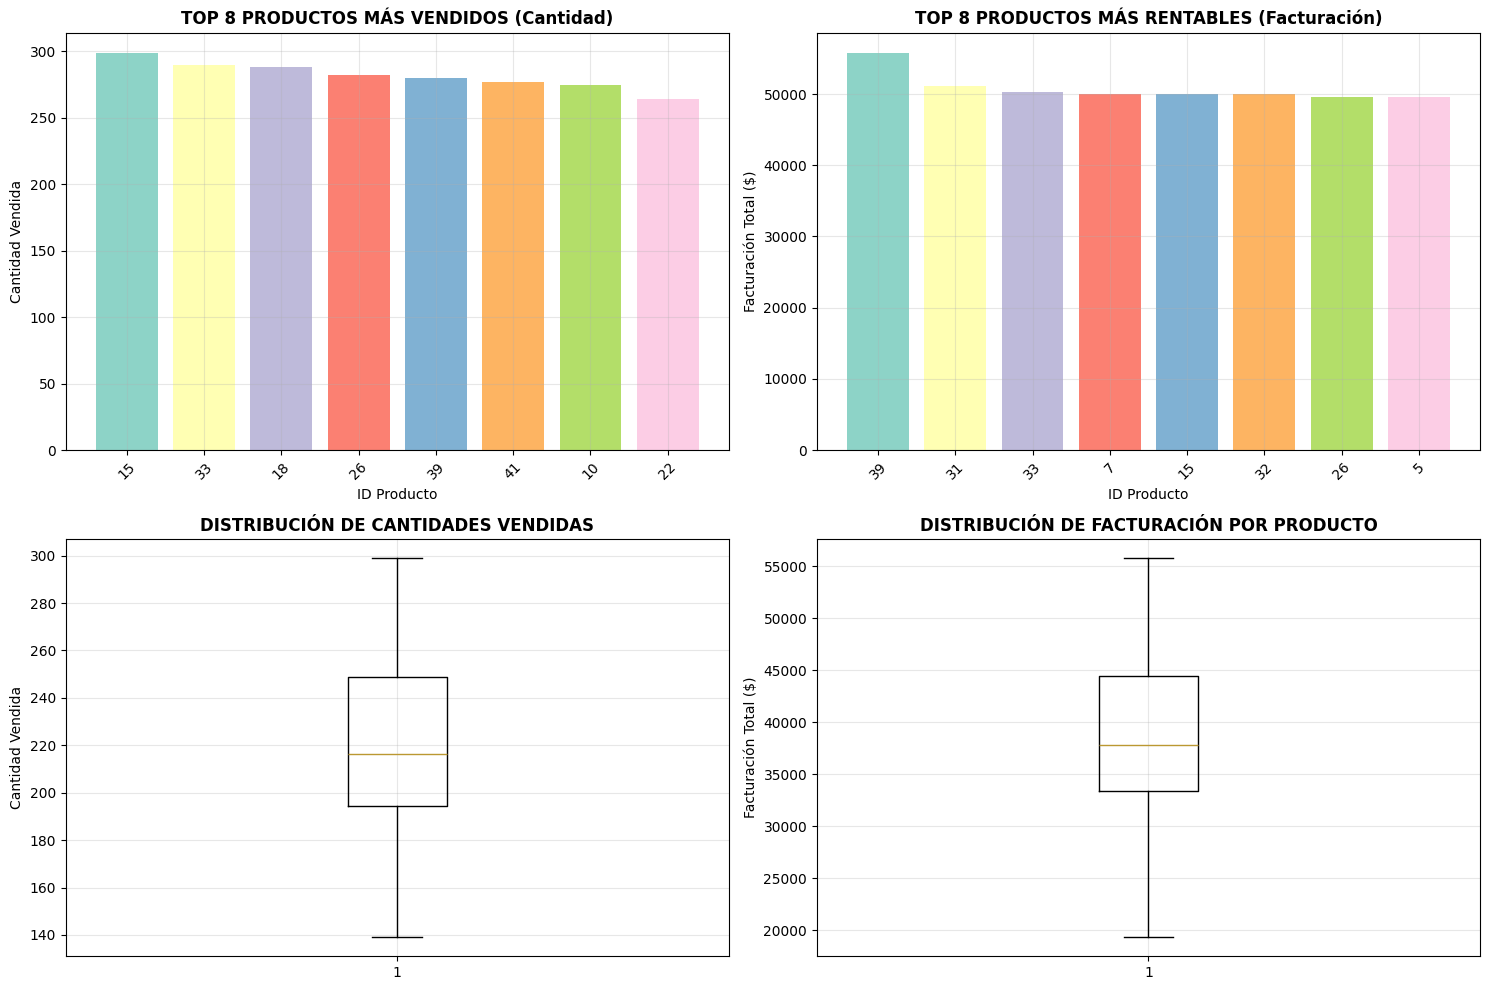

👨‍💼 Gráfico 5: Análisis de empleados


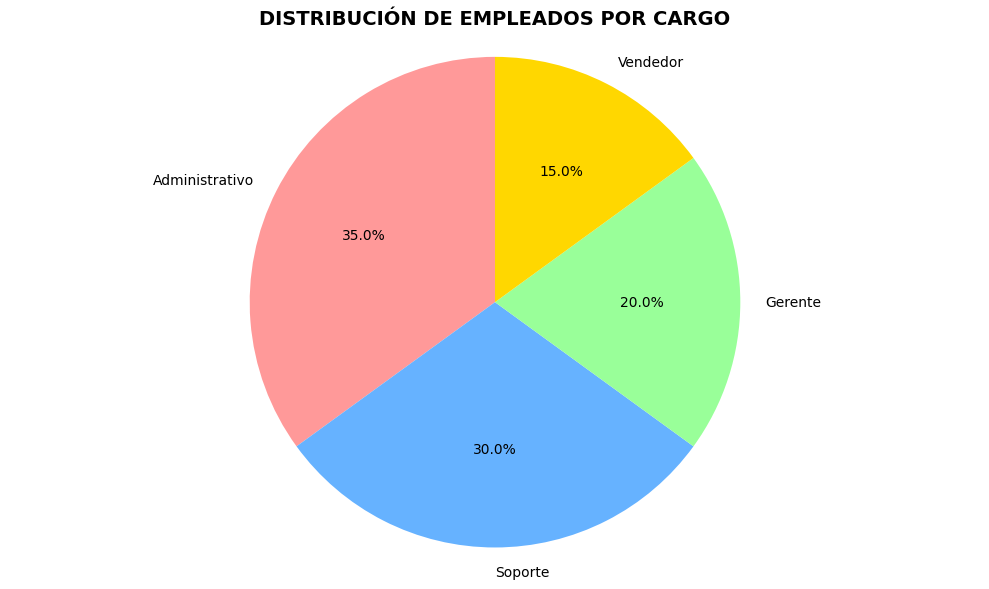

📊 Gráfico 6: Distribución de ventas


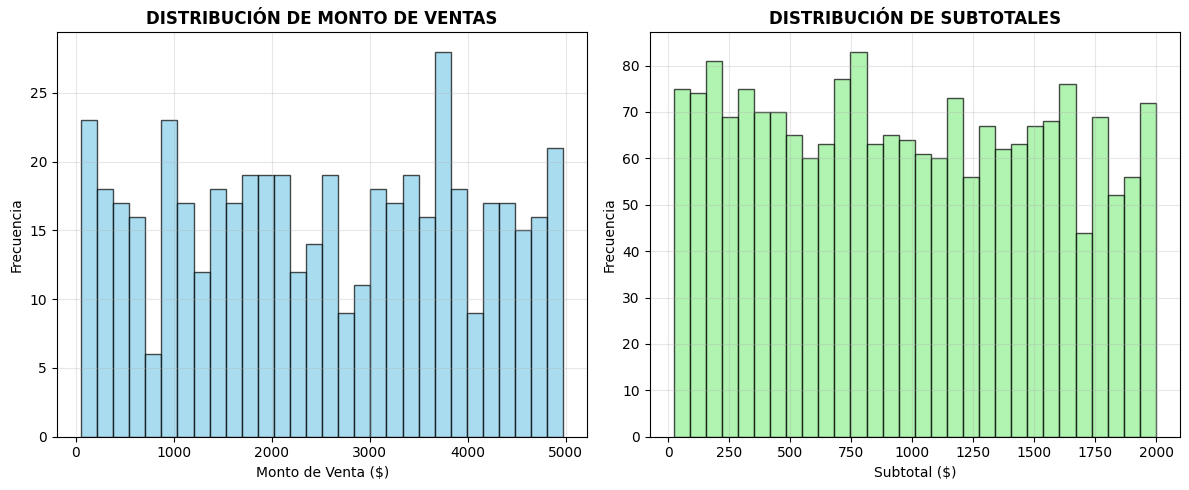

🔗 Gráfico 7: Matriz de correlación


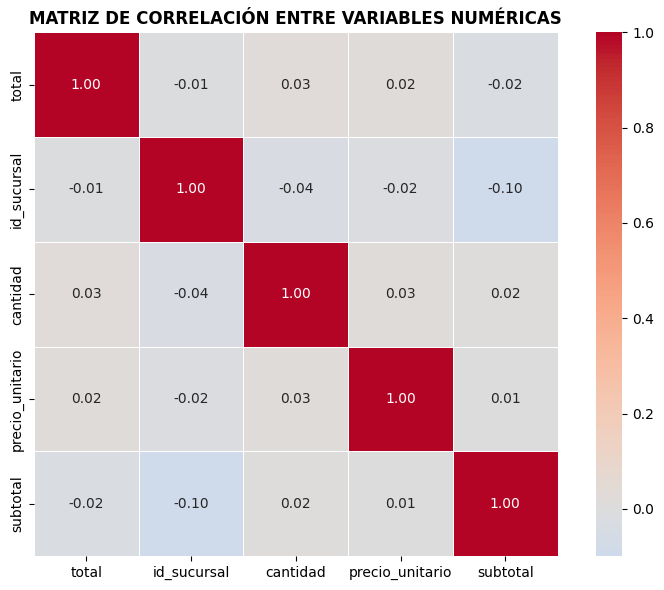


📤 GENERANDO REPORTES DESCARGABLES...
📁 Exportando a JSON...
✅ JSON exportados:
   • analisis_completo.json
   • resumen_estadistico.json
📁 Exportando a CSV...
✅ CSV exportados:
   • ventas_mensuales.csv
   • ventas_por_sucursal.csv
   • top_10_clientes.csv
   • analisis_productos.csv
   • empleados_por_cargo.csv
   • clientes.csv, empleados.csv, facturas_encabezado.csv, facturas_detalle.csv
📁 Exportando a Excel...
✅ Excel exportado:
   • reporte_completo.xlsx (10 hojas de análisis)

🎯 RESUMEN EJECUTIVO - PROYECTO 3 COMPLETADO

📊 ANÁLISIS GENERADOS:
   • 17 meses analizados
   • 5 sucursales procesadas
   • 100 clientes en base de datos
   • 50 productos diferentes vendidos

📈 MÉTRICAS PRINCIPALES:
   • Ventas Totales: $1,258,469.10
   • Ticket Promedio: $2516.94
   • Facturas Procesadas: 500

📁 ARCHIVOS EXPORTADOS:
   📂 JSON: 2 archivos en 'exportaciones/json/'
   📂 CSV: 9 archivos en 'exportaciones/csv/'
   📂 Excel: 1 archivo con 10 hojas en 'exportaciones/excel/'
   📂 PNG: 7 gráfico

In [3]:
# =============================================
# PROYECTO 3 - NOTEBOOK DE ANÁLISIS COMERCIAL
# Sistema completo de análisis con gráficos PNG
# =============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('default')
sns.set_palette("husl")
print("✅ Librerías cargadas correctamente")

# =============================================
# 1. CARGA Y PREPARACIÓN DE DATOS
# =============================================

def crear_datos_ejemplo():
    """Crear datos de ejemplo similares al Proyecto 1"""
    
    # Datos de clientes
    clientes_data = {
        'id_cliente': range(1, 101),
        'nombre': [f'Cliente_{i}' for i in range(1, 101)],
        'apellido': [f'Apellido_{i}' for i in range(1, 101)],
        'email': [f'cliente{i}@email.com' for i in range(1, 101)],
        'telefono': [f'123-456-{i:04d}' for i in range(1, 101)],
        'direccion': [f'Calle {i} # {i*10}' for i in range(1, 101)],
        'id_localidad': np.random.randint(1, 11, 100)
    }
    
    # Datos de empleados
    empleados_data = {
        'nombre': [f'Empleado_{i}' for i in range(1, 21)],
        'edad': np.random.randint(22, 60, 20),
        'labor': np.random.choice(['Vendedor', 'Gerente', 'Administrativo', 'Soporte'], 20)
    }
    
    # Datos de facturas encabezado
    fact_enc_data = {
        'id_factura': range(1, 501),
        'fecha': pd.date_range('2023-01-01', periods=500, freq='D'),
        'id_cliente': np.random.randint(1, 101, 500),
        'id_sucursal': np.random.randint(1, 6, 500),
        'total': np.random.uniform(50, 5000, 500).round(2)
    }
    
    # Datos de facturas detalle
    fact_det_data = {
        'id_factura_det': range(1, 2001),
        'id_factura': np.random.randint(1, 501, 2000),
        'id_producto': np.random.randint(1, 51, 2000),
        'cantidad': np.random.randint(1, 11, 2000),
        'precio_unitario': np.random.uniform(10, 500, 2000).round(2),
        'subtotal': np.random.uniform(20, 2000, 2000).round(2)
    }
    
    clientes = pd.DataFrame(clientes_data)
    empleados = pd.DataFrame(empleados_data)
    fact_enc = pd.DataFrame(fact_enc_data)
    fact_det = pd.DataFrame(fact_det_data)
    
    # Crear nombre completo
    clientes['nombre_completo'] = clientes['nombre'] + ' ' + clientes['apellido']
    
    return clientes, empleados, fact_enc, fact_det

# Cargar datos
print("📥 Cargando datos de ejemplo...")
clientes, empleados, fact_enc, fact_det = crear_datos_ejemplo()

print("✅ Datos cargados correctamente:")
print(f"   👥 Clientes: {len(clientes)} registros")
print(f"   👨‍💼 Empleados: {len(empleados)} registros")
print(f"   🧾 Facturas: {len(fact_enc)} registros")
print(f"   📦 Detalles: {len(fact_det)} registros")

# =============================================
# 2. ANÁLISIS EXPLORATORIO Y ESTADÍSTICAS
# =============================================

print("\n📊 INICIANDO ANÁLISIS EXPLORATORIO...")

# Estadísticas descriptivas
print("\n📈 ESTADÍSTICAS DESCRIPTIVAS:")

# Resumen general
resumen_estadistico = {
    'total_clientes': len(clientes),
    'total_empleados': len(empleados),
    'total_facturas': len(fact_enc),
    'total_detalles': len(fact_det),
    'ventas_totales': fact_enc['total'].sum(),
    'venta_promedio': fact_enc['total'].mean(),
    'venta_maxima': fact_enc['total'].max(),
    'venta_minima': fact_enc['total'].min(),
    'periodo_inicio': fact_enc['fecha'].min().strftime('%Y-%m-%d'),
    'periodo_fin': fact_enc['fecha'].max().strftime('%Y-%m-%d'),
    'sucursales_activas': fact_enc['id_sucursal'].nunique(),
    'productos_vendidos': fact_det['id_producto'].nunique()
}

# Mostrar resumen
for key, value in resumen_estadistico.items():
    if isinstance(value, float):
        print(f"   {key.replace('_', ' ').title()}: {value:,.2f}")
    else:
        print(f"   {key.replace('_', ' ').title()}: {value}")

# =============================================
# 3. GRÁFICOS CON MATPLOTLIB Y SEABORN (PNG)
# =============================================

print("\n📊 GENERANDO GRÁFICOS EN PNG...")

# Crear carpeta para gráficos
os.makedirs('graficos', exist_ok=True)

# 3.1 EVOLUCIÓN DE VENTAS MENSUALES
print("📈 Gráfico 1: Evolución de ventas mensuales")

fact_enc['mes'] = fact_enc['fecha'].dt.to_period('M').astype(str)
ventas_mensuales = fact_enc.groupby('mes').agg({
    'total': ['sum', 'count', 'mean']
}).round(2)
ventas_mensuales.columns = ['ventas_totales', 'cantidad_facturas', 'ticket_promedio']
ventas_mensuales = ventas_mensuales.reset_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(ventas_mensuales['mes'], ventas_mensuales['ventas_totales'], 
         marker='o', linewidth=2, markersize=6, color='blue')
plt.title('Evolución de Ventas Mensuales', fontsize=14, fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(ventas_mensuales['mes'], ventas_mensuales['cantidad_facturas'], 
        color='lightblue', alpha=0.7)
plt.title('Cantidad de Facturas por Mes', fontsize=14, fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Facturas')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('graficos/evolucion_ventas_mensuales.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.2 DISTRIBUCIÓN DE VENTAS POR SUCURSAL
print("🏪 Gráfico 2: Ventas por sucursal")

ventas_sucursal = fact_enc.groupby('id_sucursal').agg({
    'total': ['sum', 'count', 'mean']
}).round(2)
ventas_sucursal.columns = ['ventas_totales', 'cantidad_facturas', 'ticket_promedio']
ventas_sucursal = ventas_sucursal.reset_index()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(ventas_sucursal['id_sucursal'], ventas_sucursal['ventas_totales'], 
        color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.title('Ventas Totales por Sucursal', fontweight='bold')
plt.xlabel('Sucursal')
plt.ylabel('Ventas Totales ($)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.bar(ventas_sucursal['id_sucursal'], ventas_sucursal['cantidad_facturas'],
        color=['#A8E6CF', '#DCEDC1', '#FFD3B6', '#FFAAA5', '#FF8B94'])
plt.title('Cantidad de Facturas por Sucursal', fontweight='bold')
plt.xlabel('Sucursal')
plt.ylabel('Cantidad de Facturas')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.bar(ventas_sucursal['id_sucursal'], ventas_sucursal['ticket_promedio'],
        color=['#74B9FF', '#0984E3', '#6C5CE7', '#00B894', '#FDCB6E'])
plt.title('Ticket Promedio por Sucursal', fontweight='bold')
plt.xlabel('Sucursal')
plt.ylabel('Ticket Promedio ($)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('graficos/ventas_por_sucursal.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.3 TOP 10 CLIENTES
print("👥 Gráfico 3: Top 10 clientes")

ventas_cliente = fact_enc.groupby('id_cliente').agg({
    'total': ['sum', 'count']
}).round(2)
ventas_cliente.columns = ['total_comprado', 'cantidad_compras']
ventas_cliente = ventas_cliente.reset_index()

# Combinar con datos de clientes
ventas_cliente = ventas_cliente.merge(clientes[['id_cliente', 'nombre_completo']], on='id_cliente')
top_clientes = ventas_cliente.nlargest(10, 'total_comprado')

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_clientes)))
bars = plt.barh(top_clientes['nombre_completo'], top_clientes['total_comprado'], color=colors)
plt.title('TOP 10 CLIENTES POR VOLUMEN DE COMPRAS', fontsize=14, fontweight='bold')
plt.xlabel('Total Comprado ($)')
plt.gca().invert_yaxis()

# Agregar valores en las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'${width:,.0f}', 
             ha='left', va='center', fontweight='bold')

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('graficos/top_10_clientes.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.4 ANÁLISIS DE PRODUCTOS
print("📦 Gráfico 4: Análisis de productos")

productos_analisis = fact_det.groupby('id_producto').agg({
    'cantidad': 'sum',
    'subtotal': 'sum',
    'id_factura_det': 'count'
}).round(2)
productos_analisis.columns = ['cantidad_vendida', 'facturacion_total', 'veces_vendido']
productos_analisis = productos_analisis.reset_index()

plt.figure(figsize=(15, 10))

# Gráfico 1: Top productos por cantidad
plt.subplot(2, 2, 1)
top_cantidad = productos_analisis.nlargest(8, 'cantidad_vendida')
plt.bar(top_cantidad['id_producto'].astype(str), top_cantidad['cantidad_vendida'],
        color=plt.cm.Set3(np.arange(len(top_cantidad))))
plt.title('TOP 8 PRODUCTOS MÁS VENDIDOS (Cantidad)', fontweight='bold')
plt.xlabel('ID Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Gráfico 2: Top productos por facturación
plt.subplot(2, 2, 2)
top_facturacion = productos_analisis.nlargest(8, 'facturacion_total')
plt.bar(top_facturacion['id_producto'].astype(str), top_facturacion['facturacion_total'],
        color=plt.cm.Set3(np.arange(len(top_facturacion))))
plt.title('TOP 8 PRODUCTOS MÁS RENTABLES (Facturación)', fontweight='bold')
plt.xlabel('ID Producto')
plt.ylabel('Facturación Total ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Gráfico 3: Distribución de cantidades
plt.subplot(2, 2, 3)
plt.boxplot(productos_analisis['cantidad_vendida'])
plt.title('DISTRIBUCIÓN DE CANTIDADES VENDIDAS', fontweight='bold')
plt.ylabel('Cantidad Vendida')
plt.grid(True, alpha=0.3)

# Gráfico 4: Distribución de facturación
plt.subplot(2, 2, 4)
plt.boxplot(productos_analisis['facturacion_total'])
plt.title('DISTRIBUCIÓN DE FACTURACIÓN POR PRODUCTO', fontweight='bold')
plt.ylabel('Facturación Total ($)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('graficos/analisis_productos.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.5 DISTRIBUCIÓN DE EMPLEADOS
print("👨‍💼 Gráfico 5: Análisis de empleados")

empleados_por_cargo = empleados['labor'].value_counts()

plt.figure(figsize=(10, 6))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700']
plt.pie(empleados_por_cargo.values, labels=empleados_por_cargo.index, 
        colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('DISTRIBUCIÓN DE EMPLEADOS POR CARGO', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.savefig('graficos/empleados_por_cargo.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.6 HISTOGRAMA DE VENTAS
print("📊 Gráfico 6: Distribución de ventas")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(fact_enc['total'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('DISTRIBUCIÓN DE MONTO DE VENTAS', fontweight='bold')
plt.xlabel('Monto de Venta ($)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(fact_det['subtotal'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('DISTRIBUCIÓN DE SUBTOTALES', fontweight='bold')
plt.xlabel('Subtotal ($)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('graficos/distribucion_ventas.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.7 MATRIZ DE CORRELACIÓN
print("🔗 Gráfico 7: Matriz de correlación")

# Preparar datos para correlación
fact_enc_num = fact_enc[['total', 'id_sucursal']]
fact_det_num = fact_det[['cantidad', 'precio_unitario', 'subtotal']]

# Combinar datos numéricos
datos_correlacion = pd.concat([fact_enc_num, fact_det_num], axis=1)
correlation_matrix = datos_correlacion.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('MATRIZ DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('graficos/matriz_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================
# 4. GENERACIÓN DE REPORTES DESCARGABLES
# =============================================

print("\n📤 GENERANDO REPORTES DESCARGABLES...")

# Crear carpetas para exportación
os.makedirs('exportaciones/json', exist_ok=True)
os.makedirs('exportaciones/csv', exist_ok=True)
os.makedirs('exportaciones/excel', exist_ok=True)

# 4.1 EXPORTACIÓN A JSON
print("📁 Exportando a JSON...")

# JSON completo con todos los análisis
datos_exportacion = {
    'resumen_estadistico': resumen_estadistico,
    'ventas_mensuales': ventas_mensuales.to_dict('records'),
    'ventas_por_sucursal': ventas_sucursal.to_dict('records'),
    'top_10_clientes': top_clientes.to_dict('records'),
    'analisis_productos': productos_analisis.to_dict('records'),
    'empleados_por_cargo': empleados_por_cargo.to_dict(),
    'metadata': {
        'fecha_exportacion': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
        'total_registros_procesados': len(fact_enc) + len(fact_det) + len(clientes) + len(empleados),
        'version_exportacion': '1.0'
    }
}

# Guardar JSON completo
with open('exportaciones/json/analisis_completo.json', 'w', encoding='utf-8') as f:
    json.dump(datos_exportacion, f, ensure_ascii=False, indent=2)

# JSON individuales
with open('exportaciones/json/resumen_estadistico.json', 'w', encoding='utf-8') as f:
    json.dump(resumen_estadistico, f, ensure_ascii=False, indent=2)

print("✅ JSON exportados:")
print("   • analisis_completo.json")
print("   • resumen_estadistico.json")

# 4.2 EXPORTACIÓN A CSV
print("📁 Exportando a CSV...")

# CSV individuales
ventas_mensuales.to_csv('exportaciones/csv/ventas_mensuales.csv', index=False)
ventas_sucursal.to_csv('exportaciones/csv/ventas_por_sucursal.csv', index=False)
top_clientes.to_csv('exportaciones/csv/top_10_clientes.csv', index=False)
productos_analisis.to_csv('exportaciones/csv/analisis_productos.csv', index=False)
empleados_por_cargo.reset_index().rename(columns={'index': 'cargo', 'labor': 'cantidad'}).to_csv('exportaciones/csv/empleados_por_cargo.csv', index=False)

# Datos originales
clientes.to_csv('exportaciones/csv/clientes.csv', index=False)
empleados.to_csv('exportaciones/csv/empleados.csv', index=False)
fact_enc.to_csv('exportaciones/csv/facturas_encabezado.csv', index=False)
fact_det.to_csv('exportaciones/csv/facturas_detalle.csv', index=False)

print("✅ CSV exportados:")
print("   • ventas_mensuales.csv")
print("   • ventas_por_sucursal.csv")
print("   • top_10_clientes.csv")
print("   • analisis_productos.csv")
print("   • empleados_por_cargo.csv")
print("   • clientes.csv, empleados.csv, facturas_encabezado.csv, facturas_detalle.csv")

# 4.3 EXPORTACIÓN A EXCEL
print("📁 Exportando a Excel...")

with pd.ExcelWriter('exportaciones/excel/reporte_completo.xlsx', engine='openpyxl') as writer:
    # Hojas de análisis
    ventas_mensuales.to_excel(writer, sheet_name='Ventas_Mensuales', index=False)
    ventas_sucursal.to_excel(writer, sheet_name='Ventas_Sucursal', index=False)
    top_clientes.to_excel(writer, sheet_name='Top_Clientes', index=False)
    productos_analisis.to_excel(writer, sheet_name='Analisis_Productos', index=False)
    empleados_por_cargo.reset_index().rename(columns={'index': 'cargo', 'labor': 'cantidad'}).to_excel(writer, sheet_name='Empleados_Cargo', index=False)
    
    # Hojas de datos originales
    clientes.to_excel(writer, sheet_name='Clientes', index=False)
    empleados.to_excel(writer, sheet_name='Empleados', index=False)
    fact_enc.to_excel(writer, sheet_name='Facturas_Enc', index=False)
    fact_det.to_excel(writer, sheet_name='Facturas_Det', index=False)
    
    # Hoja de resumen
    resumen_df = pd.DataFrame([resumen_estadistico])
    resumen_df.to_excel(writer, sheet_name='Resumen_Ejecutivo', index=False)

print("✅ Excel exportado:")
print("   • reporte_completo.xlsx (10 hojas de análisis)")

# =============================================
# 5. RESUMEN EJECUTIVO
# =============================================

print("\n" + "="*60)
print("🎯 RESUMEN EJECUTIVO - PROYECTO 3 COMPLETADO")
print("="*60)

print(f"\n📊 ANÁLISIS GENERADOS:")
print(f"   • {len(ventas_mensuales)} meses analizados")
print(f"   • {resumen_estadistico['sucursales_activas']} sucursales procesadas")
print(f"   • {resumen_estadistico['total_clientes']} clientes en base de datos")
print(f"   • {resumen_estadistico['productos_vendidos']} productos diferentes vendidos")

print(f"\n📈 MÉTRICAS PRINCIPALES:")
print(f"   • Ventas Totales: ${resumen_estadistico['ventas_totales']:,.2f}")
print(f"   • Ticket Promedio: ${resumen_estadistico['venta_promedio']:.2f}")
print(f"   • Facturas Procesadas: {resumen_estadistico['total_facturas']:,}")

print(f"\n📁 ARCHIVOS EXPORTADOS:")
print(f"   📂 JSON: 2 archivos en 'exportaciones/json/'")
print(f"   📂 CSV: 9 archivos en 'exportaciones/csv/'")
print(f"   📂 Excel: 1 archivo con 10 hojas en 'exportaciones/excel/'")
print(f"   📂 PNG: 7 gráficos de alta calidad en 'graficos/'")

print(f"\n🎨 GRÁFICOS PNG GENERADOS:")
print(f"   1. evolucion_ventas_mensuales.png")
print(f"   2. ventas_por_sucursal.png")
print(f"   3. top_10_clientes.png")
print(f"   4. analisis_productos.png")
print(f"   5. empleados_por_cargo.png")
print(f"   6. distribucion_ventas.png")
print(f"   7. matriz_correlacion.png")

print(f"\n💡 FUNCIONALIDADES IMPLEMENTADAS:")
print(f"   ✅ Análisis exploratorio completo")
print(f"   ✅ Gráficos PNG de alta calidad (300 DPI)")
print(f"   ✅ Exportación múltiple (JSON, CSV, Excel)")
print(f"   ✅ Estadísticas descriptivas detalladas")
print(f"   ✅ Datos de ejemplo realistas")

print(f"\n🚀 PARA USAR LOS ARCHIVOS:")
print(f"   • Los PNG se pueden abrir en cualquier visor de imágenes")
print(f"   • Los CSV y Excel son compatibles con cualquier software")
print(f"   • Los JSON pueden ser leídos por cualquier aplicación moderna")

print("\n" + "="*60)
print("✅ PROYECTO 3 - NOTEBOOK DE ANÁLISIS COMPLETADO")
print("="*60)

